Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) Plot bar charts showing impact of employee salaries on retention Plot bar charts showing corelation between department and employee retention Now build logistic regression model using variables that were narrowed down in step 1 Measure the accuracy of the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [8]:
print("No of employees lost by the company: ", df[df['left']==1].shape[0])
print("No of employees retained by the company: ", df[df['left']==0].shape[0])

No of employees lost by the company:  3571
No of employees retained by the company:  11428


In [10]:
df1 = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left']]

In [11]:

df1 = df[['left','salary']]
left = df1[df['left']==1].salary.value_counts()
retained = df1[df['left']==0].salary.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts1 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts1 = pd.DataFrame(counts1)
counts1

,retained,left,retained_percent,left_percent
salary,,,,
low,5144,2172,0.703116,0.296884
medium,5129,1317,0.795687,0.204313
high,1155,82,0.933711,0.066289


C:\Users\User\AppData\Local\Temp\ipykernel_15396\2224747439.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\User\AppData\Local\Temp\ipykernel_15396\2224747439.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


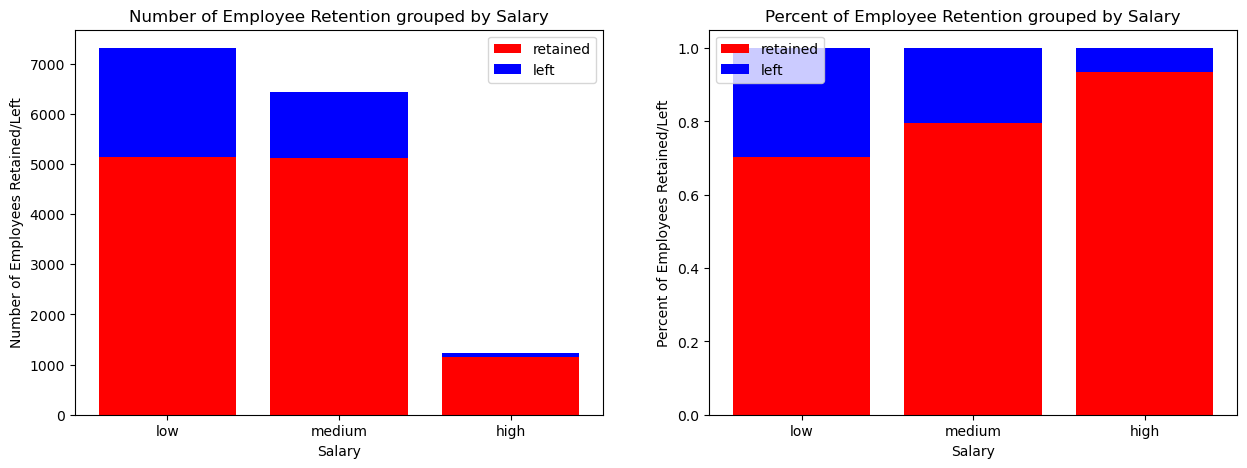

In [12]:
x = counts1.index
y1 = counts1.retained
y2 = counts1.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])
y1 = counts1.retained_percent
y2 = counts1.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()


In [13]:

df1 = df[['left','Department']]
left = df1[df['left']==1].Department.value_counts()
retained = df1[df['left']==0].Department.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts2 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts2 = pd.DataFrame(counts2)
counts2

,retained,left,retained_percent,left_percent
Department,,,,
IT,954,273,0.777506,0.222494
RandD,666,121,0.846252,0.153748
accounting,563,204,0.734029,0.265971
hr,524,215,0.709066,0.290934
management,539,91,0.855556,0.144444
marketing,655,203,0.763403,0.236597
product_mng,704,198,0.780488,0.219512
sales,3126,1014,0.755072,0.244928
support,1674,555,0.751009,0.248991


C:\Users\User\AppData\Local\Temp\ipykernel_15396\2715417331.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\User\AppData\Local\Temp\ipykernel_15396\2715417331.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


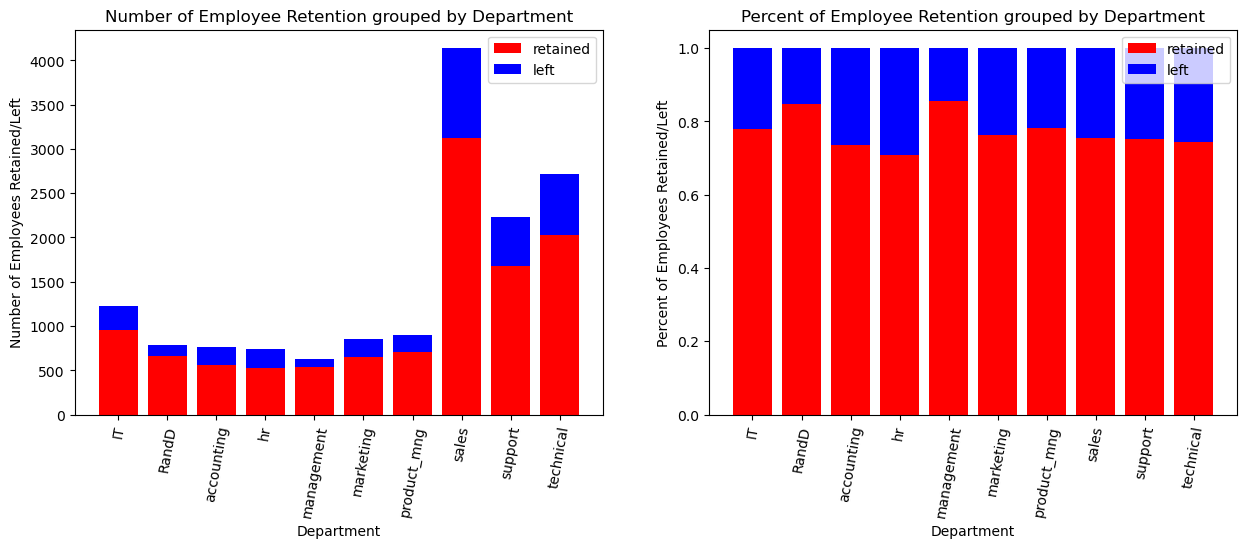

In [14]:
x = counts2.index
y1 = counts2.retained
y2 = counts2.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

y1 = counts2.retained_percent
y2 = counts2.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Percent of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

plt.show()

In [15]:

df1 = df[['left','Work_accident']]
left = df1[df['left']==1].Work_accident.value_counts()
retained = df1[df['left']==0].Work_accident.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts3 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts3 = pd.DataFrame(counts3)
counts3.index = ["No", "Yes"]
counts3

,retained,left,retained_percent,left_percent
No,9428,3402,0.734840,0.265160
Yes,2000,169,0.922084,0.077916


C:\Users\User\AppData\Local\Temp\ipykernel_15396\988834578.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\User\AppData\Local\Temp\ipykernel_15396\988834578.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


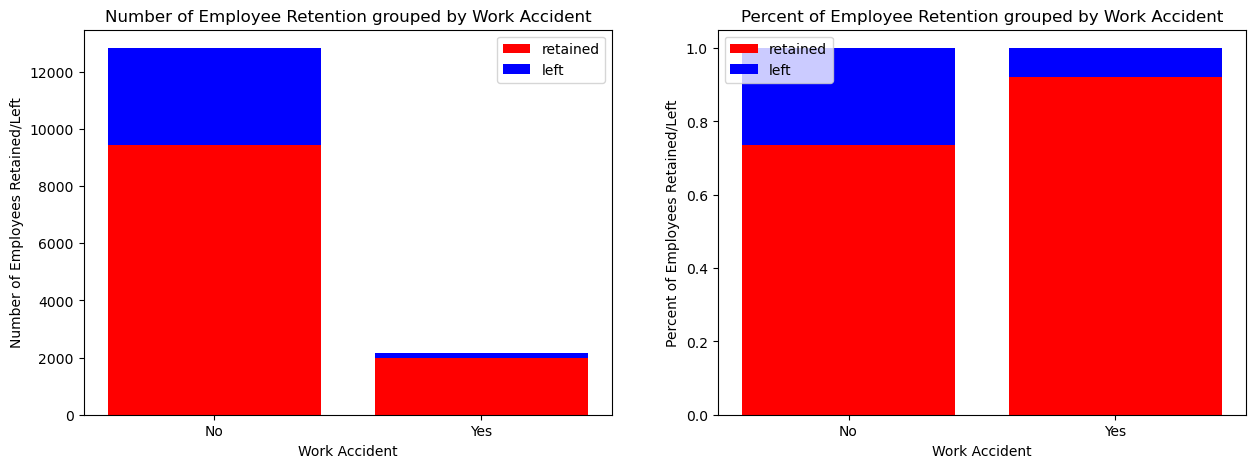

In [16]:

x = counts3.index
y1 = counts3.retained
y2 = counts3.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts3.retained_percent
y2 = counts3.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

In [18]:
df1 = df[['left','promotion_last_5years']]
left = df1[df['left']==1].promotion_last_5years.value_counts()
retained = df1[df['left']==0].promotion_last_5years.value_counts()
left_percent = left / (left + retained)
retain_percent = retained / (left + retained)
counts4 = {"retained":retained, "left":left, "retained_percent":retain_percent, "left_percent":left_percent}
counts4 = pd.DataFrame(counts4)
counts4.index = ["No", "Yes"]
counts4

,retained,left,retained_percent,left_percent
No,11128,3552,0.758038,0.241962
Yes,300,19,0.940439,0.059561


C:\Users\User\AppData\Local\Temp\ipykernel_15396\3976143739.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\User\AppData\Local\Temp\ipykernel_15396\3976143739.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


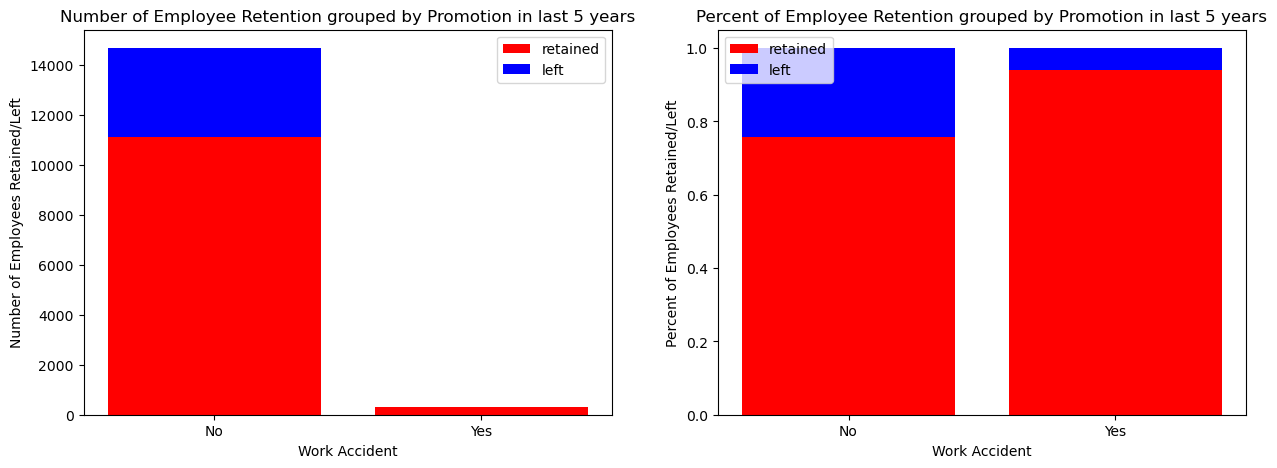

In [19]:
x = counts4.index
y1 = counts4.retained
y2 = counts4.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])

y1 = counts4.retained_percent
y2 = counts4.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Promotion in last 5 years")
plt.xlabel("Work Accident")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

In [20]:
df1 = df[['salary', 'Department','satisfaction_level', 'average_montly_hours', 'promotion_last_5years','left']]

In [21]:
df1 = pd.get_dummies(df1, columns = ['Department','salary'])

In [23]:
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,262,0,1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,272,0,1,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,223,0,1,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,159,0,1,False,False,False,False,False,False,False,True,False,False,False,True,False


In [24]:
X = np.asarray(df1.loc[:, df1.columns != 'left'])
y = np.asarray(df1.loc[:, df1.columns == 'left'])

In [25]:
from sklearn import preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.ravel())
log_pred = model.predict(X_test)

In [29]:
print(" accuracy = ", accuracy_score(y_test, log_pred)) 
print(" f1_score = ", f1_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

 accuracy =  0.772
 f1_score =  0.36074766355140186
[[2123  164]
 [ 520  193]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.54      0.27      0.36       713

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



ROC AUC SCORE:  0.7683215883912424


Text(0, 0.5, 'True Positive Rate')

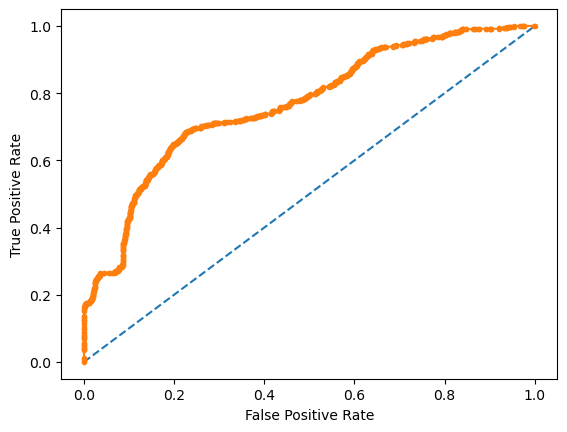

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.ravel())

y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print("ROC AUC SCORE: ",roc_auc_score(y_test, y_proba[:, 1]))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:,1])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')